In [1]:
# wordcount 


#!/usr/bin/env python3
import sys
for lines in sys.stdin:
    line = lines.strip()
    words = line.lower().split()
    for word in words:
        print(word,1)


#!/usr/bin/env python3
import sys
word_count = {}
for lines in sys.stdin:
    word, count = lines.strip().split()
    word_count[word]= word_count.get(word,0)+ int(count)
for word,count in word_count.items():
    print(word, count)

In [15]:
#mapper.py

import sys

NUM_ROWS_A = 2
NUM_COLS_B = 2
NUM_COLS_A = 2  # also NUM_ROWS_B

for line in sys.stdin:
    parts = line.strip().split()
    if len(parts) != 4:
        continue
    matrix, i, j, value = parts
    i, j, value = int(i), int(j), int(value)

    if matrix == "A":
        # For every column in B
        for col in range(1, 3):
            print(f"{i},{col}\tA,{j},{value}")
    elif matrix == "B":
        # For every row in A
        for row in range(1,3):
            print(f"{row},{j}\tB,{i},{value}")




#reducer matrix
# reducer.py




#reducer matrix
# reducer.py
import sys

current_key = None
A = {}
B = {}

for line in sys.stdin:
    line = line.strip()
    key, value = line.split('\t')
    mat, k, v = value.split(',')
    k, v = int(k), int(v)

    # When we encounter a new key
    if current_key != key:
        if current_key:
            total = 0
            for x in A:
                if x in B:
                    total += A[x] * B[x]
            print(f"{current_key}\t{total}")
        current_key = key
        A, B = {}, {}

    # Store matrix values
    if mat == 'A':
        A[k] = v
    elif mat == 'B':
        B[k] = v

# Emit result for the last key
if current_key:
    total = 0
    for x in A:
        if x in B:
            total += A[x] * B[x]
    print(f"{current_key}\t{total}")


In [17]:
# Grade marks mapper.py 4th 

#!/usr/bin/env python3
import sys

for line in sys.stdin:
    parts = line.strip().split()
    if len(parts) == 2:
        print(f"{parts[0]}\t{parts[1]}")

# reducer.py

#!/usr/bin/env python3
import sys

for line in sys.stdin:
    name, marks = line.strip().split("\t")
    m = int(marks)
    if m >= 90: g = "A+"
    elif m >= 80: g = "A"
    elif m >= 70: g = "B"
    elif m >= 60: g = "C"
    elif m >= 50: g = "D"
    else: g = "F"
    print(f"{name}\tGrade: {g}")


In [1]:
# mapper 8th

#!/usr/bin/env python3
import sys
import csv

# Use DictReader to handle headers and commas inside names
reader = csv.DictReader(sys.stdin)
for row in reader:
    try:
        survived = row.get('Survived', '').strip()
        sex = row.get('Sex', '').strip().lower()
        age = row.get('Age', '').strip()
    except Exception:
        continue

    # only deceased males and valid ages
    if survived == '0' and sex == 'male' and age not in ('', 'NA', 'None'):
        # emit key 'male' and numeric age
        print(f"male\t{age}")

#reducer


#!/usr/bin/env python3
import sys

total_age = 0.0
count = 0

for line in sys.stdin:
    line = line.strip()
    if not line:
        continue
    parts = line.split('\t')
    if len(parts) != 2:
        continue
    key, val = parts
    try:
        age = float(val)
    except:
        continue
    total_age += age
    count += 1

if count > 0:
    avg = total_age / count
    # output average with reasonable formatting
    print(f"average_age_deceased_males\t{avg:.4f}")
else:
    print("average_age_deceased_males\tNA")



Frequent Itemsets:
    support             itemsets
0  0.833333              (bread)
1  0.333333             (butter)
2  0.666667               (eggs)
3  0.666667               (milk)
4  0.333333      (butter, bread)
5  0.500000        (eggs, bread)
6  0.500000        (milk, bread)
7  0.500000         (milk, eggs)
8  0.333333  (milk, eggs, bread)

Association Rules:
     antecedents    consequents   support  confidence   lift
0       (butter)        (bread)  0.333333    1.000000  1.200
1        (bread)       (butter)  0.333333    0.400000  1.200
2         (milk)         (eggs)  0.500000    0.750000  1.125
3         (eggs)         (milk)  0.500000    0.750000  1.125
4  (milk, bread)         (eggs)  0.333333    0.666667  1.000
5  (eggs, bread)         (milk)  0.333333    0.666667  1.000
6         (milk)  (eggs, bread)  0.333333    0.500000  1.000
7         (eggs)  (milk, bread)  0.333333    0.500000  1.000


C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rutuja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Rutuja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Rutuja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


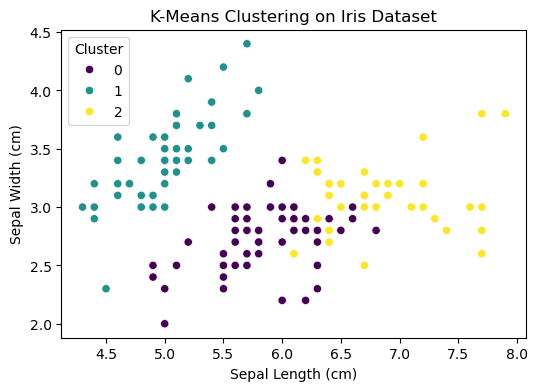

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset (transactions)
dataset = [
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread'],
    ['milk', 'eggs'],
    ['bread', 'butter'],
    ['bread', 'eggs'],
    ['milk', 'bread', 'butter', 'eggs']
]

# Convert to DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
data = te.fit(dataset).transform(dataset)
df = pd.DataFrame(data, columns=te.columns_)

# Generate frequent itemsets
frequent_items = apriori(df, min_support=0.3, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_items)

# Generate association rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Clustering using K-Means
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
X['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=X['Cluster'], palette='viridis')
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()









 Dataset Loaded Successfully
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter 

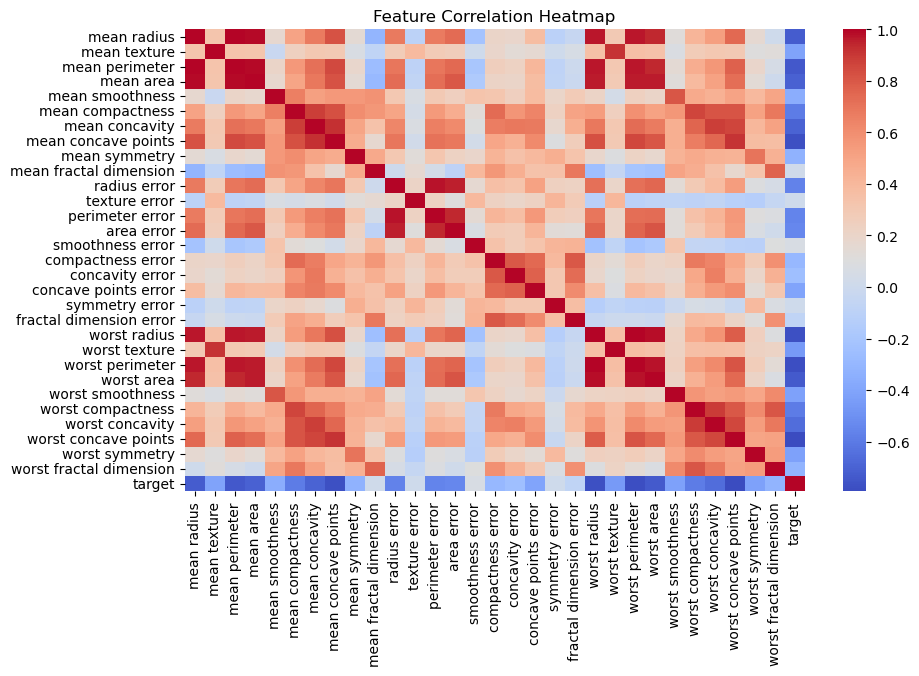

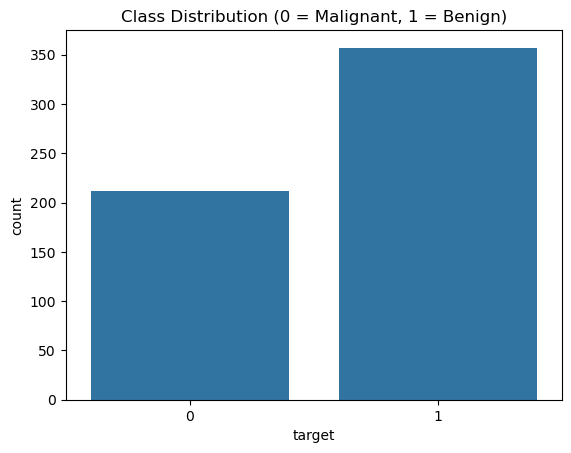

C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔹 Random Forest Results:
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



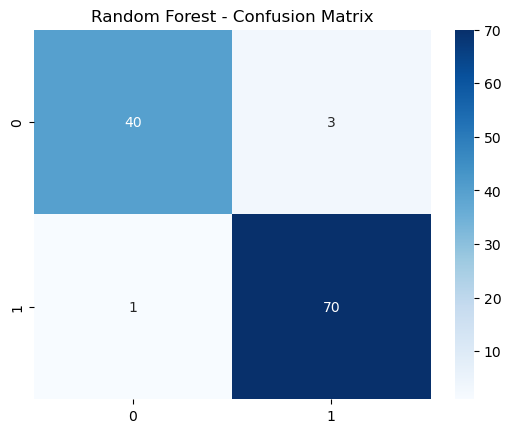

Cross-validation Accuracy: 0.9560937742586555

🔹 AdaBoost Results:
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



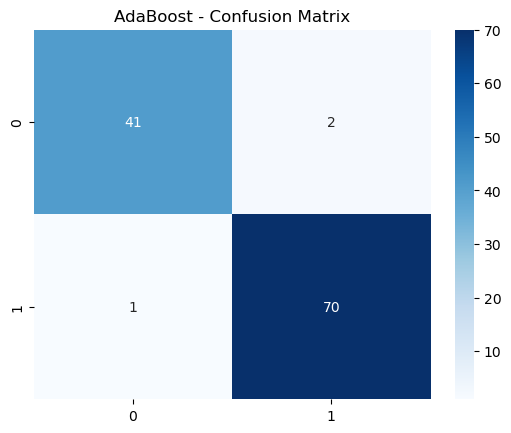

C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Rutuja\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

Cross-validation Accuracy: 0.9754075454122031

🔹 Gradient Boosting Results:
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



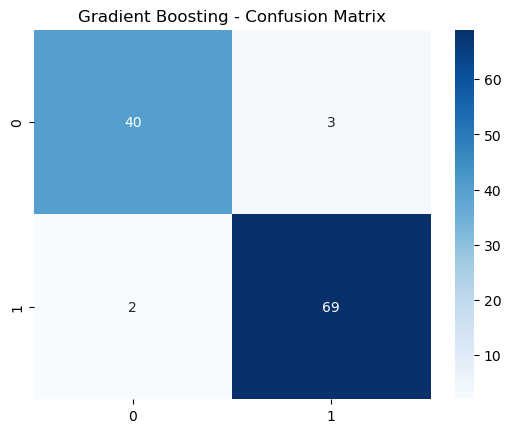

Cross-validation Accuracy: 0.9631268436578171


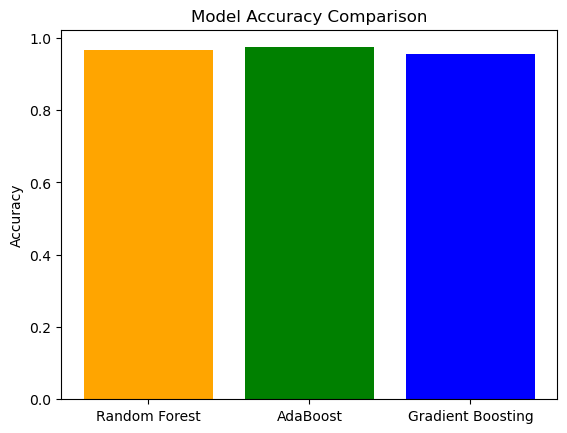

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(" Dataset Loaded Successfully")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum().sum())

# Basic statistics
print("\nSummary Statistics:\n", df.describe())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of target variable
sns.countplot(x='target', data=df)
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()


X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

models = {'Random Forest': (y_pred_rf, rf),
          'AdaBoost': (y_pred_ada, ada),
          'Gradient Boosting': (y_pred_gb, gb)}

for name, (y_pred, model) in models.items():
    print(f"\n🔹 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross-validation Accuracy:", np.mean(cv_scores))

accuracies = {
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'AdaBoost': accuracy_score(y_test, y_pred_ada),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb)
}

plt.bar(accuracies.keys(), accuracies.values(), color=['orange', 'green', 'blue'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()








In [9]:
spark shell
val textFile = sc.textFile("file://")
val words = textFile.flatMap(line=>line.split(' ') )
val wordPairs = words.map(word => (word, 1))
val wordCounts = wordPairs.reduceByKey(_+_)
val wordCounts.collect().foreach(printlin)

SyntaxError: invalid syntax (3526918887.py, line 1)